# Seaborn main plotting functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Figure-Level vs. Axes-Level Functions in Seaborn

#### 1. Figure-Level Functions: `relplot`, `displot`, `catplot`
- Create an **entire figure** with subplots automatically.
- Return a **FacetGrid** or similar object, not an `ax`.
- Support `col`, `row`, and `hue` for faceting.


#### 2. Axes-Level Functions: `scatterplot`, `lineplot`, etc.
- Work on a **specific Matplotlib Axes**.
- Require an explicit `ax` for embedding in figures.
- Return an `ax` object, modifiable with Matplotlib.

#### Relationship between Figure-Level Functions and Axes-Level Functions
`relplot` (relational)
- `scatterplot`
- `lineplot`

`displot` (distributions)
- `histplot`
- `kdeplot`
- `ecdfplot`
- `rugplot`

`catplot` (categorical)
- `stripplot`
- `swarmplot`
- `boxplot`
- `violinplot`
- `pointplot`
- `barplot`

#### Key Differences

| Feature            | Figure-Level (`sns.catplot()`, etc.) | Axes-Level (`sns.boxplot()`, etc.) |
|--------------------|----------------------------------|----------------------------------|
| Creates figure?    | ✅ Yes                           | ❌ No, needs `plt.subplots()` |
| Returns           | `FacetGrid`, `PairGrid`, etc.   | `Axes` object                 |
| Supports multiple subplots? | ✅ Yes (`col`, `row`, `hue`) | ❌ No, must use `plt.subplots()` |
| Places legend inside of `ax`? | ❌ No | ✅ Yes |


# Distribution plots

## `histplot`  and `displot`

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

In [2]:
penguins = sns.load_dataset("penguins")
penguins.sample(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
307,Gentoo,Biscoe,51.3,14.2,218.0,5300.0,Male
66,Adelie,Biscoe,35.5,16.2,195.0,3350.0,Female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,Female


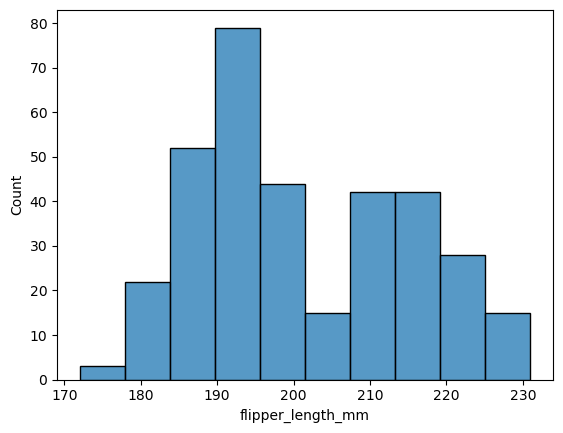

In [3]:
sns.histplot(data=penguins, x="flipper_length_mm");

### 1. Customizing axes-level function `histplot`

`histplot` returns axes object.

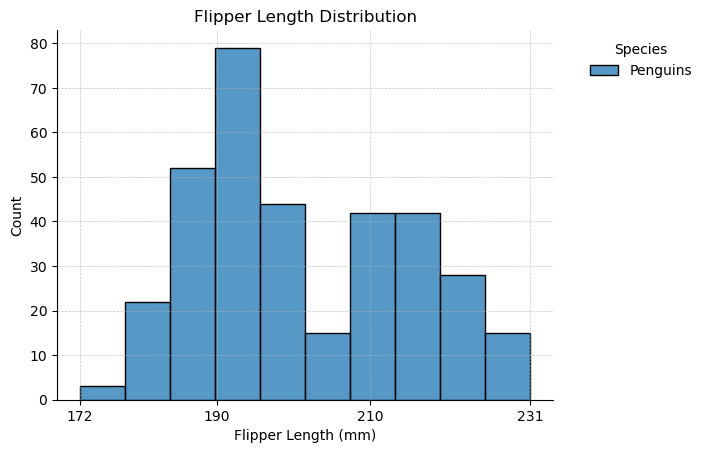

In [4]:
ax = sns.histplot(penguins, x="flipper_length_mm", label='Penguins')


ax.set_title("Flipper Length Distribution") 
ax.set_xlabel("Flipper Length (mm)")  
ax.set_ylabel("Count")  
ax.set_xticks([172, 190, 210, 231]) 
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80])  

ax.grid(True)  
ax.grid(which="major", linestyle="--", linewidth=0.5, alpha=0.7)  

ax.legend(title="Species", bbox_to_anchor=(1.05,1), loc='upper left', frameon=False);


sns.despine() 

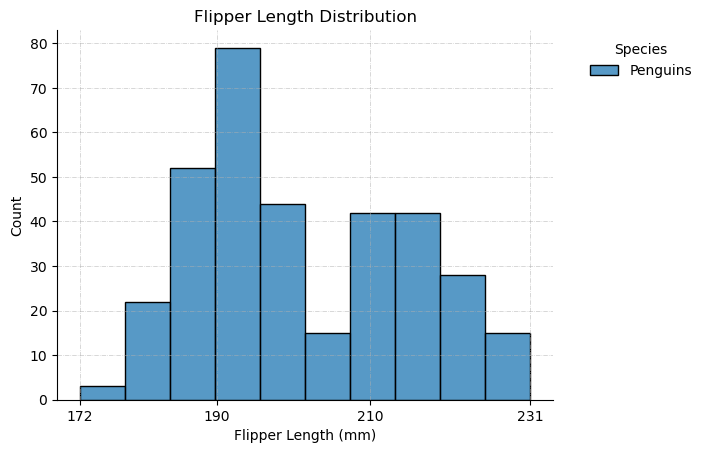

In [5]:
ax = sns.histplot(penguins, x="flipper_length_mm", label='Penguins')

ax.set(title="Flipper Length Distribution", xlabel="Flipper Length (mm)", xticks=[172, 190, 210, 231], ylabel="Count")
ax.legend(title="Species", bbox_to_anchor=(1.05,1), loc='upper left', frameon=False);

ax.grid(True)  
ax.grid(which="major", linestyle="-.", linewidth=0.5, alpha=0.7)  

sns.despine() 

### 2. Customizing fugure-level function `displot`

`displot` returns FacetGrid object.

To get access to axis, use the for-loop:
`for ax in g.axes.flat`

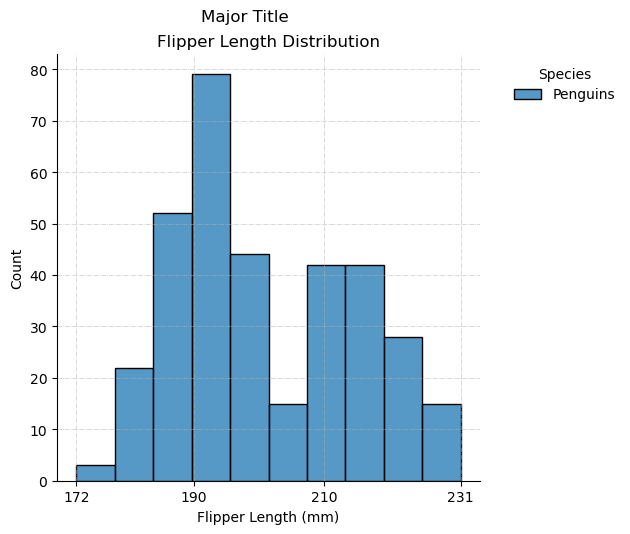

In [6]:
g = sns.displot(penguins, x="flipper_length_mm", label='Penguins')

g.set_axis_labels("Flipper Length (mm)", "Count")  
g.figure.suptitle("Major Title", y=1.06)

# FacetGrid needs to loop through axes
for ax in g.axes.flat:
    ax.set(title="Flipper Length Distribution", xlabel="Flipper Length (mm)", xticks=[172, 190, 210, 231], ylabel="Count")
    ax.legend(title="Species", bbox_to_anchor=(1.05,1), loc='upper left', frameon=False);

    ax.grid(True)  
    ax.grid(which="major", linestyle="-.", linewidth=0.5, alpha=0.7)  

### 2. Customizing axes-level and figure-level function with plt (**not recommended!**)

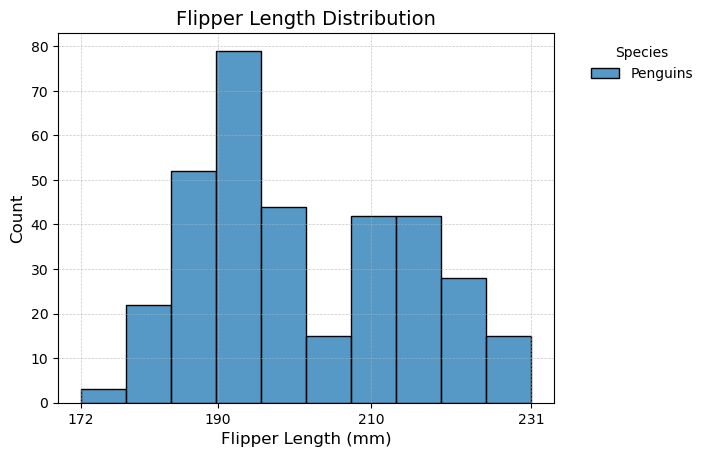

In [7]:
sns.histplot(penguins, x="flipper_length_mm", label='Penguins')

plt.title("Flipper Length Distribution", fontsize=14)  
plt.xlabel("Flipper Length (mm)", fontsize=12) 
plt.ylabel("Count", fontsize=12)  
plt.xticks([172, 190, 210, 231]) 
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80]) 
plt.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.7) 
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False);

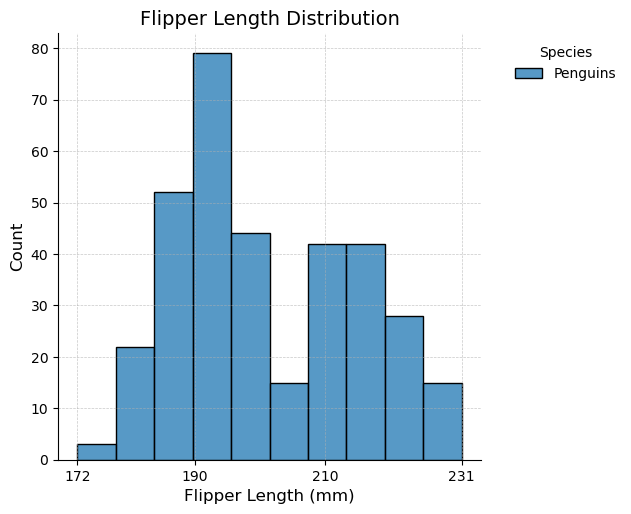

In [8]:
sns.displot(penguins, x="flipper_length_mm", label='Penguins')

plt.title("Flipper Length Distribution", fontsize=14)  
plt.xlabel("Flipper Length (mm)", fontsize=12) 
plt.ylabel("Count", fontsize=12)  
plt.xticks([172, 190, 210, 231]) 
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80]) 
plt.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.7) 
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False);

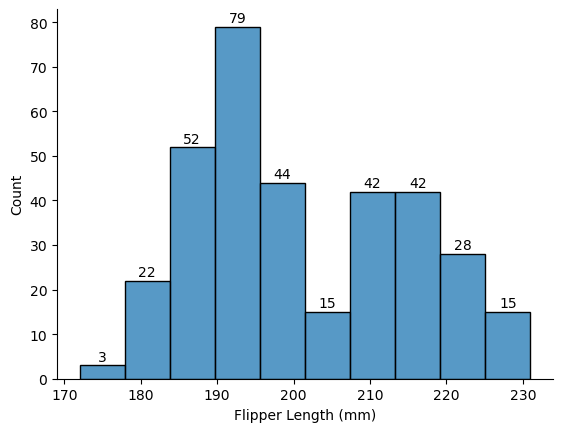

In [9]:
ax = sns.histplot(data=penguins, x="flipper_length_mm")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Count");
sns.despine()

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=1)

### Making `histplot` stylish

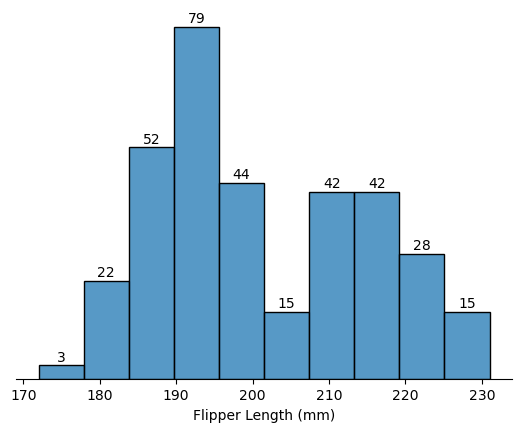

In [10]:
ax = sns.histplot(data=penguins, x="flipper_length_mm")
ax.set(xlabel="Flipper Length (mm)", yticks=[], ylabel=None)
sns.despine(left=True)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=1)

Flip the plot by assigning the data variable to the y axis:

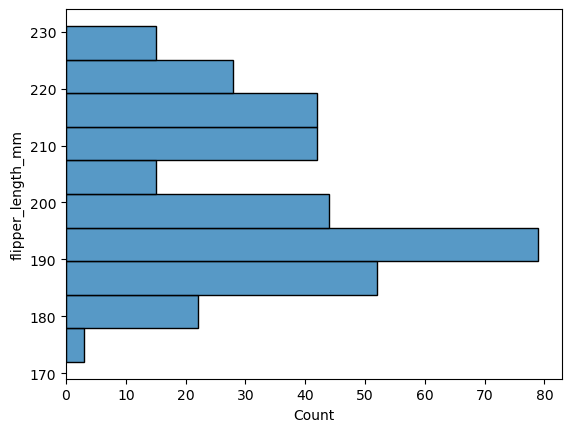

In [11]:
sns.histplot(data=penguins, y="flipper_length_mm");

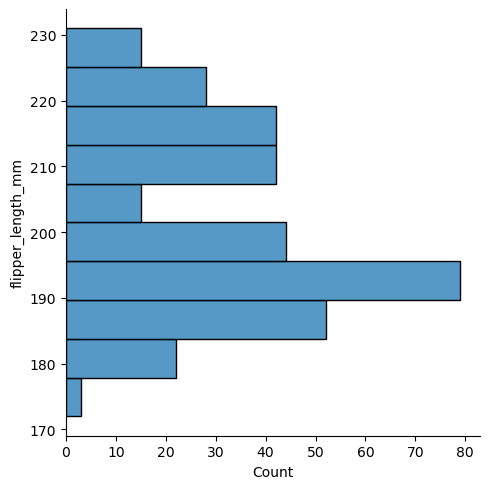

In [12]:
sns.displot(data=penguins, y="flipper_length_mm", kind='hist');

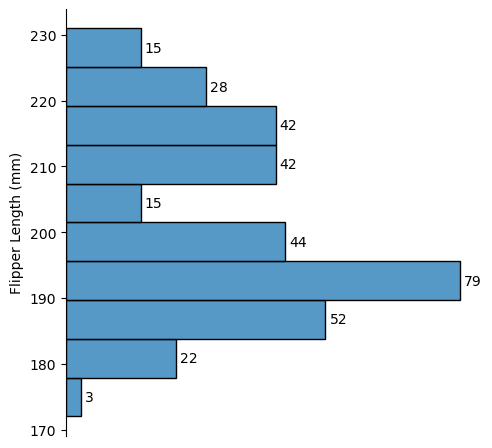

In [13]:
g = sns.displot(data=penguins, y="flipper_length_mm", kind='hist')
sns.despine(bottom=True)
g.set(xticks=[], xlabel=None, ylabel="Flipper Length (mm)")

# Add value labels on top of each bar
for ax in g.axes.flat:  
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

### Changing number of bins (default number is 10)

You can specify:
- Bin width
- Number of bins

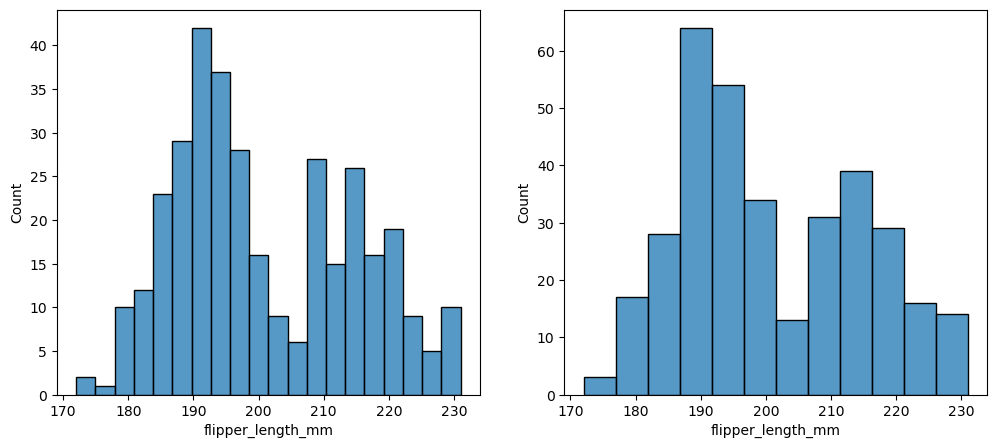

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  

sns.histplot(data=penguins, x="flipper_length_mm", binwidth=3, ax=axs[0])
sns.histplot(data=penguins, x="flipper_length_mm", bins=12, ax=axs[1]);

### Adding kernel density estimate (KDE)

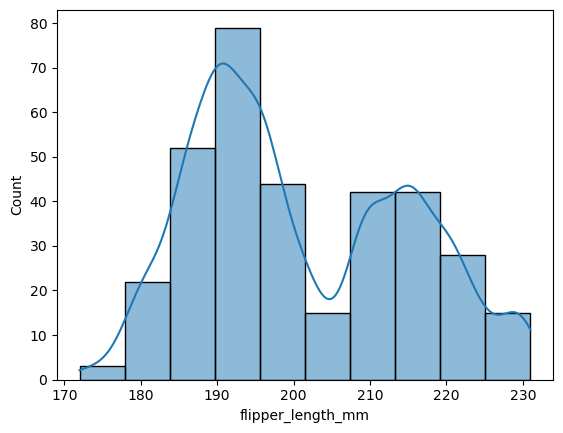

In [15]:
sns.histplot(data=penguins, x="flipper_length_mm", kde=True, kde_kws={"bw_adjust": 0.5, "cut" : 0});

### Multiple distributions: layering

- *Layering* refers to overlaying multiple plots on the same axes to compare different distributions.
- Not recommended for `histplot`.


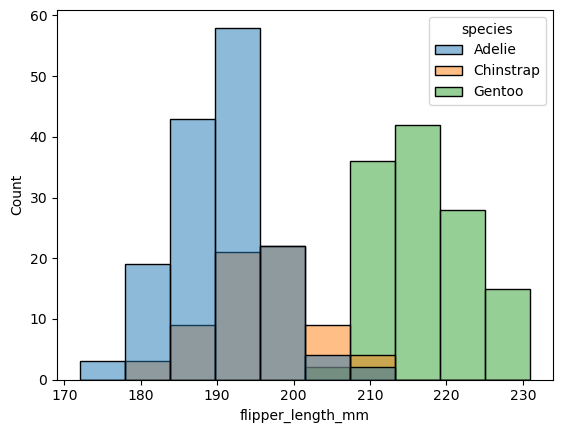

In [16]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species");

One way to improve clarity is to switch from a bar plot to a step plot, which outlines the distributions without filling the bars. 

Still far from being good.

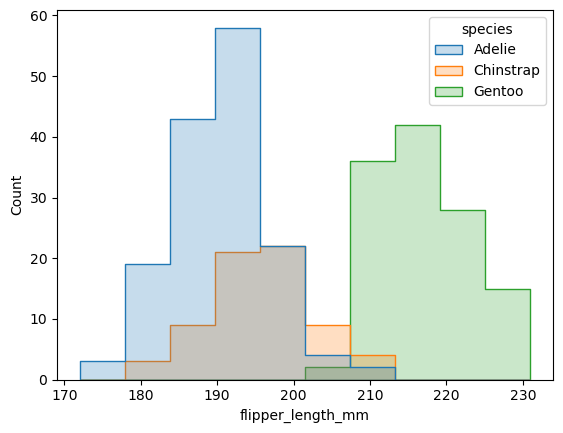

In [17]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", element="step");

### Multiple distributions: stacking

- *Stacking* means placing plots on top of each other in separate subplots (above/below).
- In `histplot`, it is better than layering, but often still causes confusion.

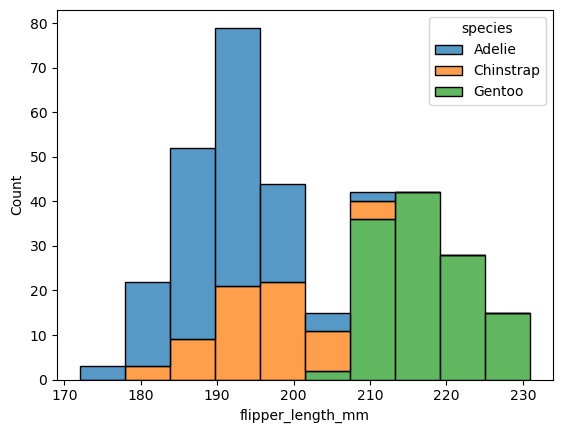

In [18]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

### Multiple distributions: dodging

- *Dodging* means displaying groups side by side.  
- In `histplot`, dodging is achieved using `hue` with `multiple="dodge"`.  
- It is useful for **categorical comparisons**, keeping distributions separate and avoiding overplotting.  
- Can still be misleading if categories have significantly different sample sizes. 

In [19]:
tips = sns.load_dataset("tips")
tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size
200,18.71,4.00,Male,Yes,Thur,Lunch,3
127,14.52,2.00,Female,No,Thur,Lunch,2
238,35.83,4.67,Female,No,Sat,Dinner,3


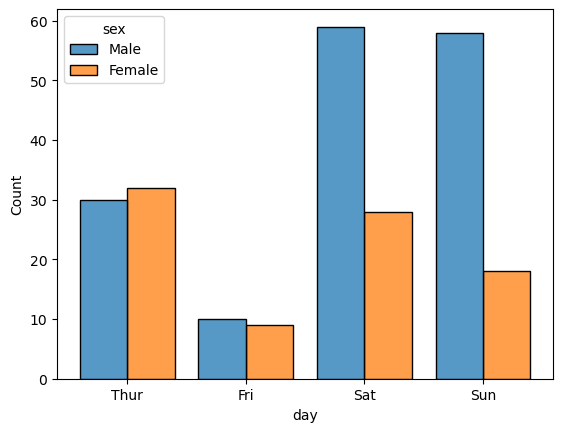

In [20]:
sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8);

### Plotting disrete / categorical values with `sns.histplot`

Default settings often result in overly narrow bin widths.

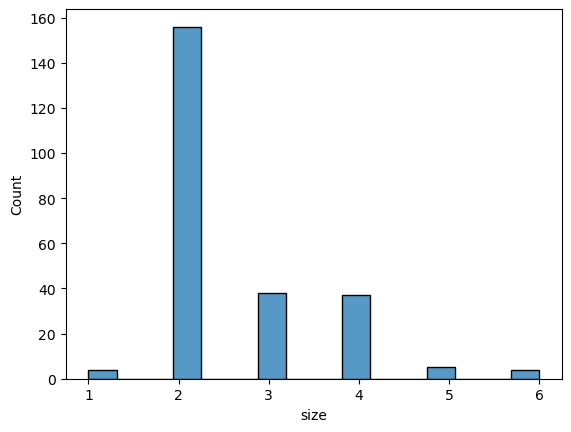

In [21]:
sns.histplot(data=tips, x="size");

You can restore the visual appeal by adjusting the following parameters:
- `discrete=True`
- `shrink=0.7`

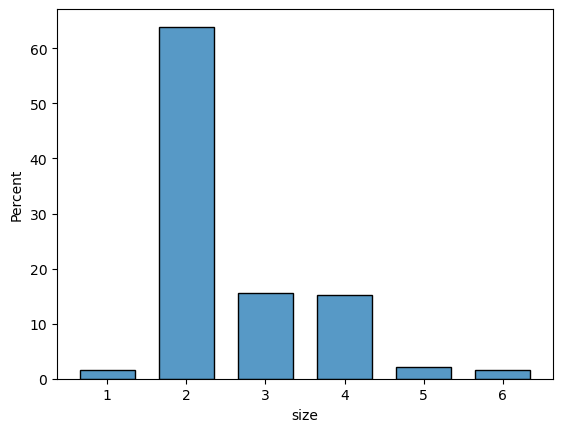

In [22]:
sns.histplot(data=tips, x="size", stat="percent", discrete=True, shrink=.7);

### Normalized histograms

When subsets have unequal numbers of observations, comparing their distributions using raw counts may be misleading. A better approach is to normalize the counts.

By default, normalization applies to the entire distribution, merely rescaling bar heights. However, setting `common_norm=False` ensures that each subset is normalized independently, allowing for fair comparisons without size bias.

This option is especially useful when comparing multiple distributions, as it highlights their shape rather than differences in sample size.

You can normalize the counts using the `stat` parameter:
- `stat="count"` (default)
- `stat="percent"`
- `stat="probability"`
- `stat="density"`

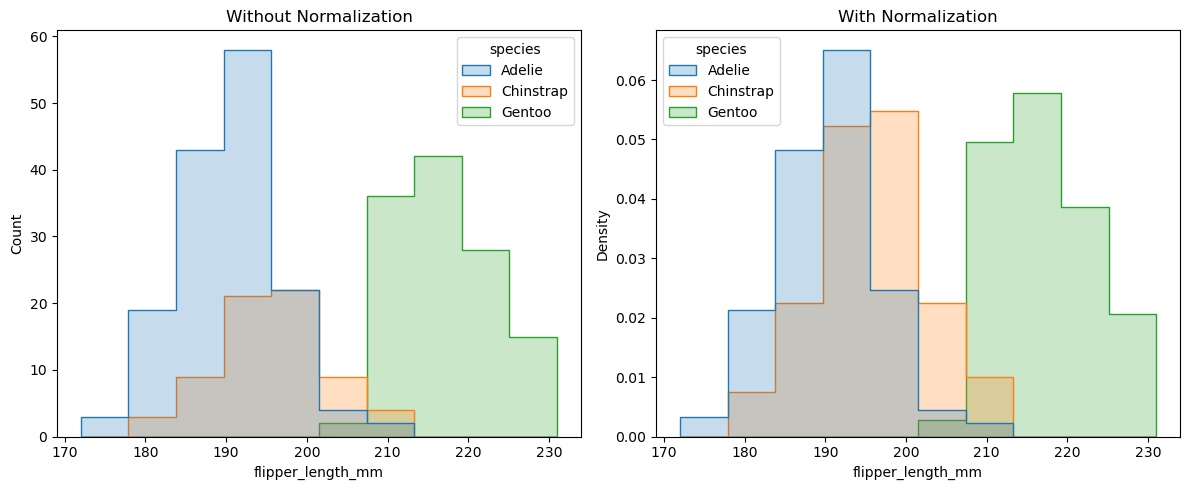

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=penguins, x="flipper_length_mm", hue="species", ax=axes[0],  element="step")
axes[0].set_title("Without Normalization")

sns.histplot(data=penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False, ax=axes[1],  element="step")
axes[1].set_title("With Normalization")

plt.tight_layout()

### Bins in log space

In [24]:
planets = sns.load_dataset("planets")
planets.sample(5)

,method,number,orbital_period,mass,distance,year
346,Radial Velocity,1,358.00000,0.640,32.62,2009
727,Transit,1,6.87349,NaN,2700.00,2010
119,Radial Velocity,2,692.00000,1.894,15.10,2007
413,Radial Velocity,1,122.10000,0.050,9.24,2010
922,Microlensing,2,5100.00000,NaN,NaN,2008


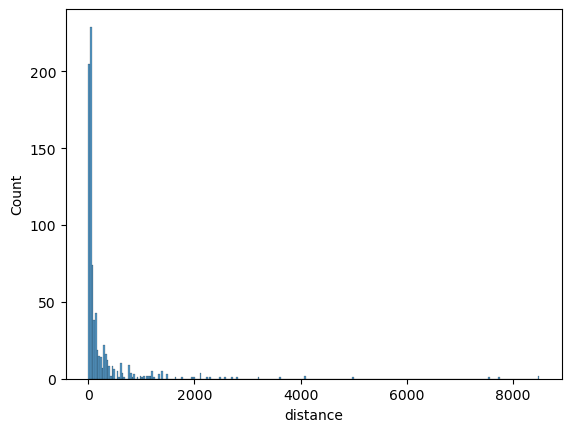

In [25]:
sns.histplot(data=planets, x="distance");

<Axes: xlabel='distance', ylabel='Count'>

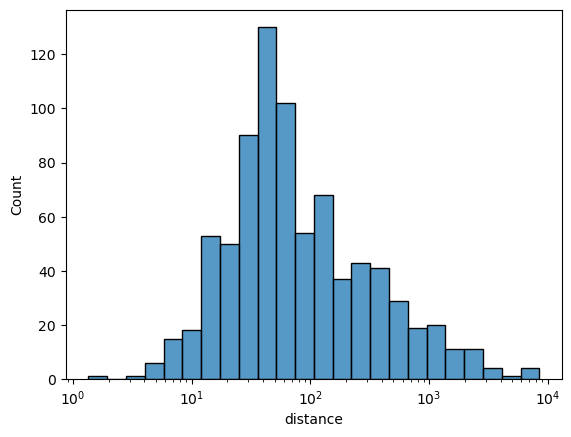

In [68]:
sns.histplot(data=planets, x="distance", log_scale=True)
# sns.histplot(data=planets, x="distance", log_scale=(True, False)); # if you want log scale along x-axis and y-axis.

### Bivariate histogram

When both x and y are assigned, a bivariate histogram is computed and shown as a heatmap.

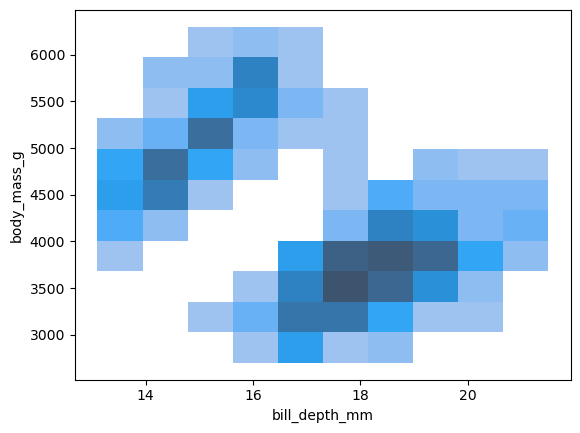

In [70]:
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g");

It accepts all of the same options for computation as its univariate counterpart, using tuples to parametrize x and y independently:

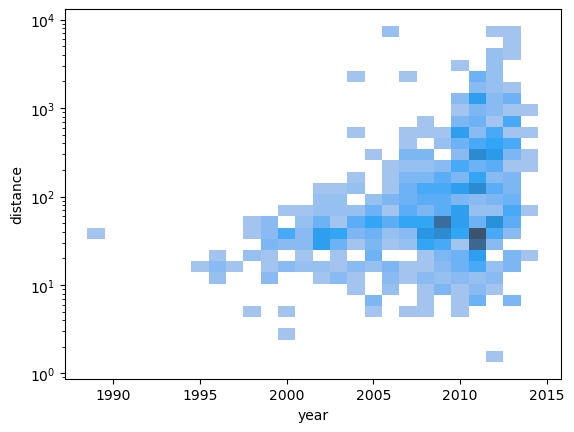

In [71]:
sns.histplot(planets, x="year", y="distance", bins=30, discrete=(True, False), log_scale=(False, True));

To annotate the colormap, add a colorbar:

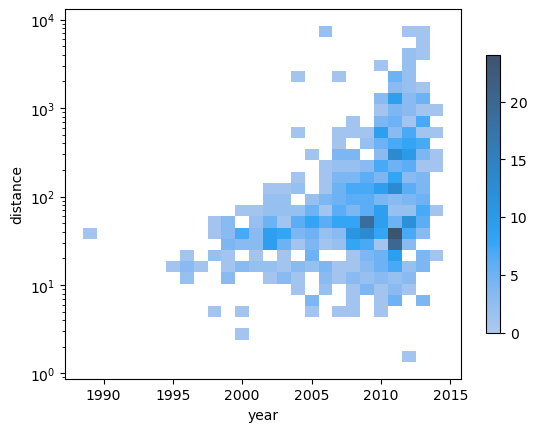

In [72]:
sns.histplot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True, cbar_kws=dict(shrink=.75)
);

## `kdeplot`  and `displot`


Kernel Density Estimation (KDE) is a non-parametric technique for estimating the probability density function (PDF) of a continuous variable. It smooths data points by placing a kernel (typically a Gaussian) over each observation and summing their contributions.

#### Key features:
- Provides a smooth estimate of the underlying distribution.
- Controlled by the **bandwidth** parameter, which determines the level of smoothing.
- Useful for visualizing distributions without relying on histograms.

#### Considerations:
- A **small bandwidth** captures fine details but may introduce noise.
- A **large bandwidth** results in excessive smoothing, potentially hiding patterns.
- KDE assumes a continuous variable and may not be very misleading for categorical data.

#### Parameters:
- `bw_adjust`
    - Controls the bandwidth of the kernel.
    - Affects the smoothness of the density curve.
    - Default is `bw_adjust=1`, meaning we use standard bandwidth determined by the data and kernel type.
        - Provides a balanced smoothness that works well in most cases.
    - **Higher values** increase smoothing (broader curve).
    - **Lower values** reduce smoothing (more sensitive to data variations).

- `cut`
    - Determines how far the KDE extends beyond the data range.
    - Default is `cut=3`, meaning the curve extends 3 bandwidths past the min/max.
    - **Higher values** extend the curve further, potentially introducing unrealistic tails.
    - **Lower values** restrict the range, limiting estimation outside the observed data.


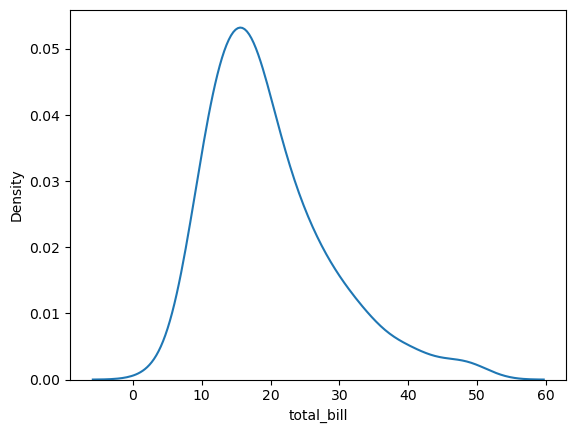

In [73]:
sns.kdeplot(tips, x="total_bill");
# sns.kdeplot(tips, y="total_bill")

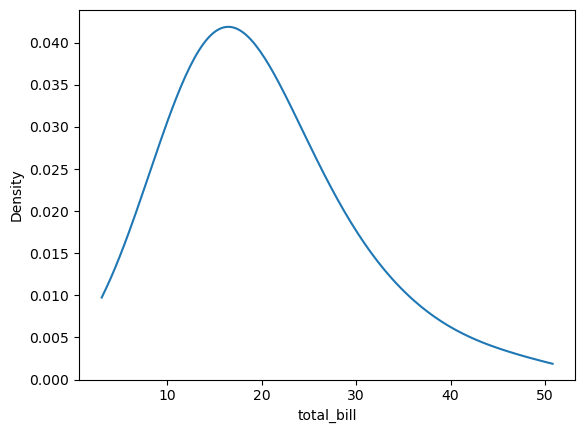

In [74]:
sns.kdeplot(data=tips, x="total_bill", bw_adjust=2, cut=0);

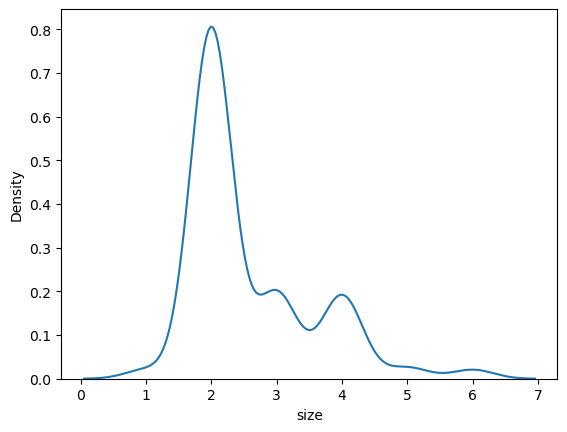

In [32]:
sns.kdeplot(tips, x="size");

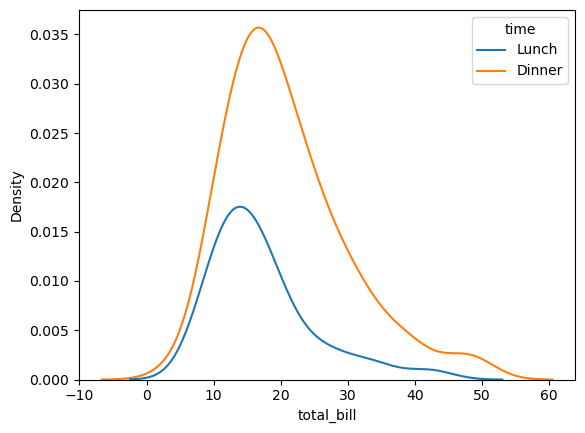

In [33]:
sns.kdeplot(data=tips, x="total_bill", hue="time");

We can modify the appearance:

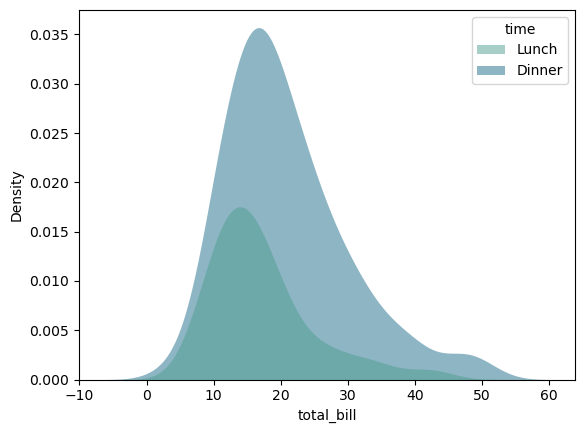

In [34]:
sns.kdeplot(
   data=tips, x="total_bill", hue="time",
   fill=True, common_norm=True, palette="crest",
   alpha=.5, linewidth=0
);

#### `palette` options

The `palette` parameter controls the color scheme used for different categories when `hue` is specified. 

#### Recommended Palettes for KDE:
1. *Sequential Palettes* (Best for ordered or numeric `hue` values like `size`)
   - `"crest"` (Smooth blue-green gradient)
   - `"mako"` (Dark-to-light blue)
   - `"viridis"` (Perceptually uniform, good for accessibility)
   - `"rocket"` (Dark red to light pink)

2. *Diverging Palettes* (For contrasting two groups)
   - `"coolwarm"` (Blue to red contrast)
   - `"RdBu"` (Red-blue gradient)
   - `"Spectral"` (Multi-hue divergence)

3. *Categorical Palettes* (For distinct categories)
   - `"deep"` (Default seaborn categorical colors)
   - `"Set1"`, `"Set2"`, `"Set3"` (Vivid categorical sets)
   - `"tab10"` (Matplotlib’s default categorical colors)

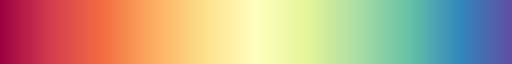

In [35]:
# To explore available palettes:
sns.color_palette("Spectral", as_cmap=True)

- "under" – The color assigned to values **below** the normal data range (e.g., values below `vmin`).
- "bad" – The color used for **missing (`NaN`) or invalid** values.
- "over" – The color assigned to values **above** the normal data range (e.g., values above `vmax`).

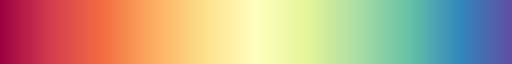

In [36]:
my_cmap = sns.color_palette("Spectral", as_cmap=True)
my_cmap.set_bad("black")
my_cmap

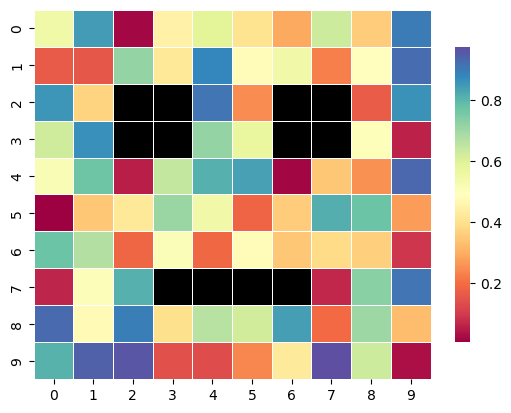

In [37]:
data = np.random.rand(10, 10)
data[2:4, 2:4] = np.nan  
data[2:4, 6:8] = np.nan  
data[7, 3:7] = np.nan  

sns.heatmap(data, cmap=my_cmap, linewidths=0.5, cbar=True, cbar_kws=dict(shrink=.8));

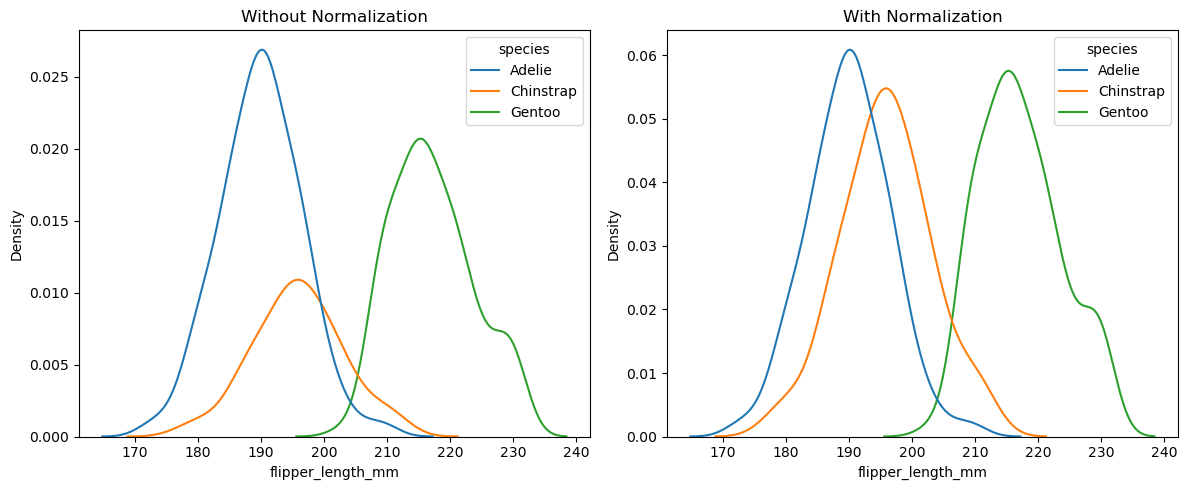

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", ax=axes[0])
axes[0].set_title("Without Normalization")

sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", common_norm=False, ax=axes[1])
axes[1].set_title("With Normalization")

plt.tight_layout()

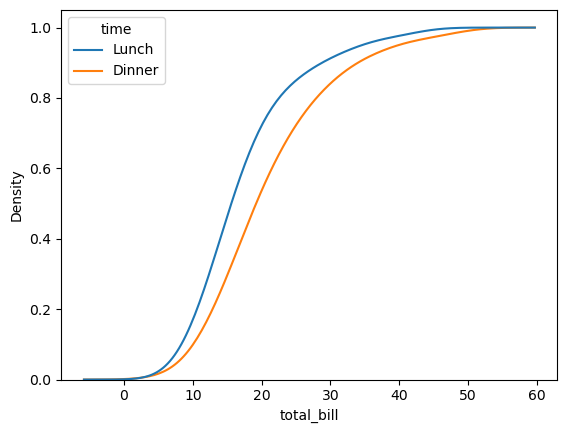

In [39]:
sns.kdeplot(
    data=tips, x="total_bill", hue="time",
    cumulative=True, common_norm=False, common_grid=True
);

### Bivariate KDE

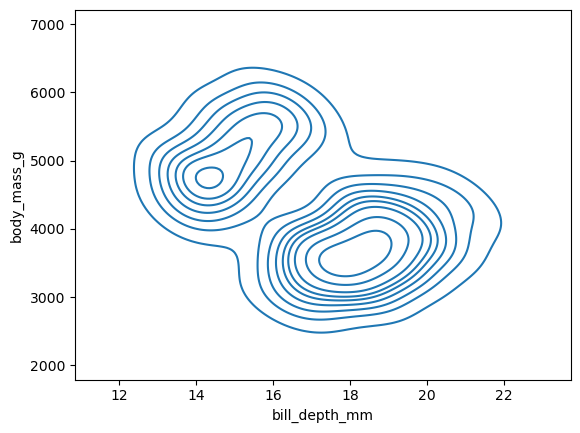

In [40]:
sns.kdeplot(penguins, x="bill_depth_mm", y="body_mass_g");

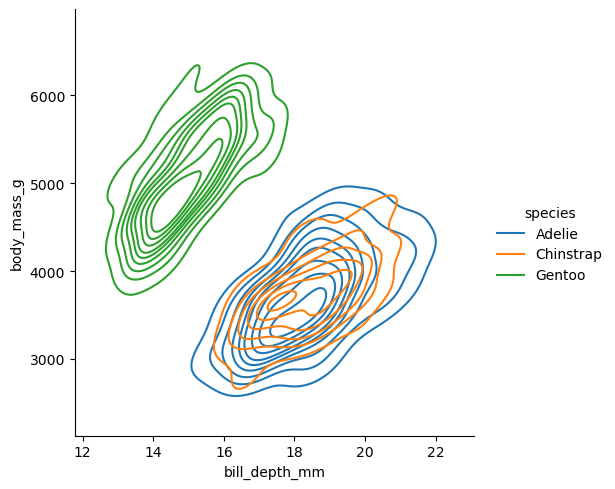

In [41]:
sns.displot(penguins, x="bill_depth_mm", y="body_mass_g", hue="species", kind='kde');

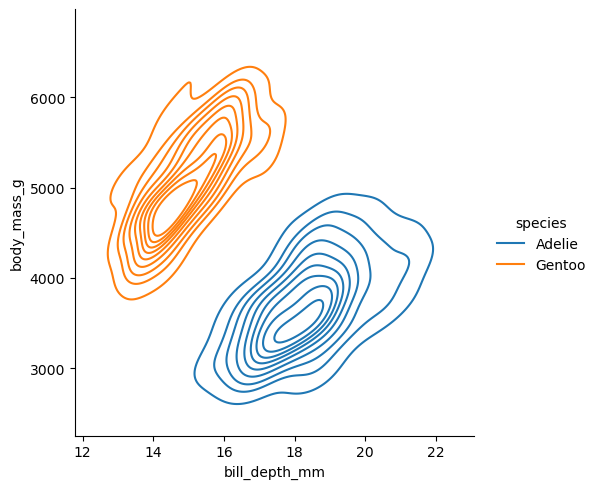

In [42]:
adelie_gentoo = penguins[penguins["species"].isin(["Adelie", "Gentoo"])]

sns.displot(adelie_gentoo, x="bill_depth_mm", y="body_mass_g", hue="species", kind="kde")

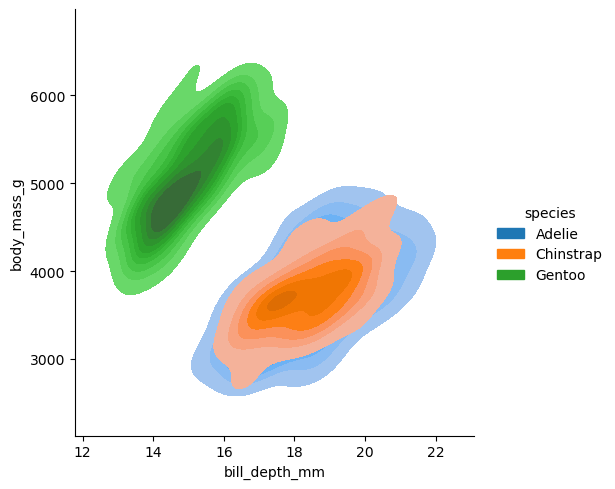

In [43]:
sns.displot(penguins, x="bill_depth_mm", y="body_mass_g", hue="species", fill=True, kind='kde');

## `ecdfplot`

#### Empirical Cumulative Distribution Function (ECDF) Plot

The `ecdfplot()` function in Seaborn visualizes the **empirical cumulative distribution function (ECDF)** of a dataset. Unlike histograms and KDE plots, which estimate density, an ECDF directly represents the proportion of data points that are **less than or equal to** a given value.

#### **Key Features:**
- Displays the cumulative proportion of observations.
- Provides a clear, non-smoothed view of the data distribution.
- Avoids binning artifacts present in histograms.
- Supports grouping with `hue` for categorical comparisons.

#### **When to Use:**
- To compare distributions without losing individual data points.
- When analyzing cumulative trends in numerical data.
- As an alternative to histograms and KDE plots for discrete or small datasets.

The ECDF is particularly useful for visualizing **percentiles** in an intuitive way.


In [44]:
penguins = sns.load_dataset("penguins")
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
326,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,Female
141,Adelie,Dream,40.6,17.2,187.0,3475.0,Male
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male
275,Gentoo,Biscoe,45.0,15.4,220.0,5050.0,Male
189,Chinstrap,Dream,52.0,20.7,210.0,4800.0,Male


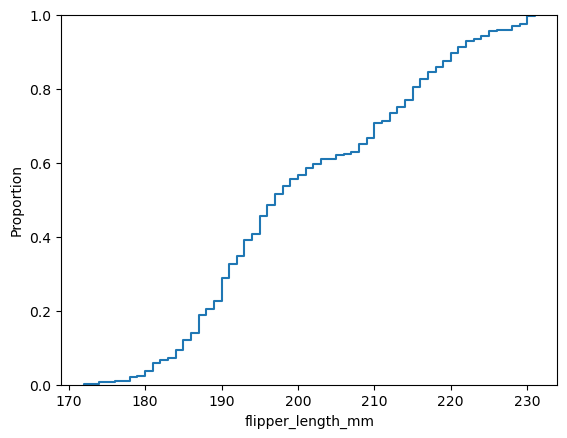

In [45]:
sns.ecdfplot(data=penguins, x="flipper_length_mm");

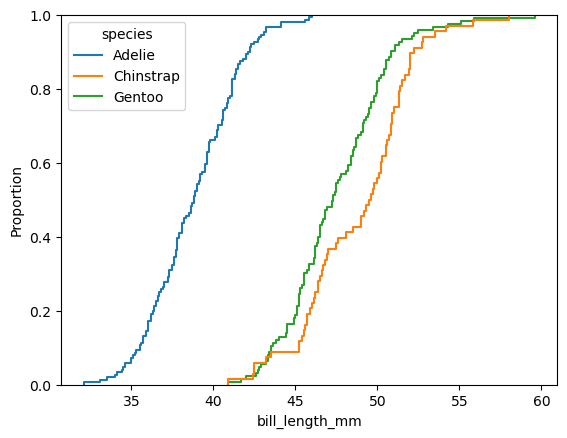

In [46]:
sns.ecdfplot(data=penguins, x="bill_length_mm", hue="species");

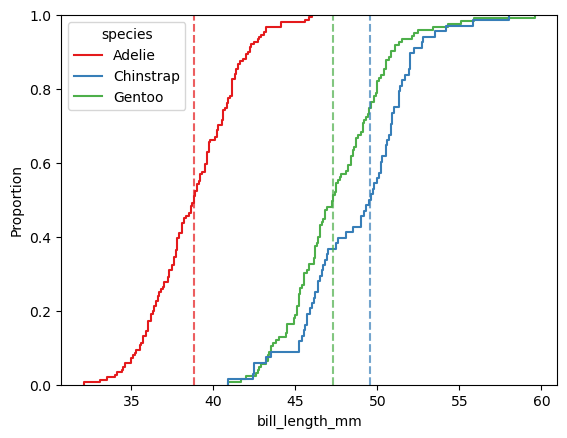

In [47]:
palette = sns.color_palette("Set1", n_colors=penguins["species"].nunique())
ax = sns.ecdfplot(data=penguins, x="bill_length_mm", hue="species", palette=palette)

medians = penguins.groupby("species")["bill_length_mm"].median()

# We map species to the corresponding colors from the palette
species_list = penguins["species"].unique()
species_colors = dict(zip(species_list, palette))  # match species to color

# Now we plot vertical dashed lines for medians with the correct colors
for species, median in medians.items():
    plt.axvline(median, linestyle="dashed", alpha=0.7, color=species_colors[species])


## `rugplot`

Provides a **marginal distribution visualization** by drawing small ticks (or "rugs") along an axis to represent individual data points.

### Rug in 1D

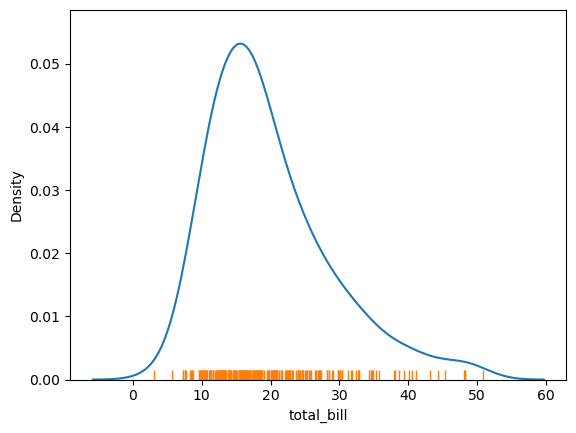

In [48]:
sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill");

### Rug in 2D

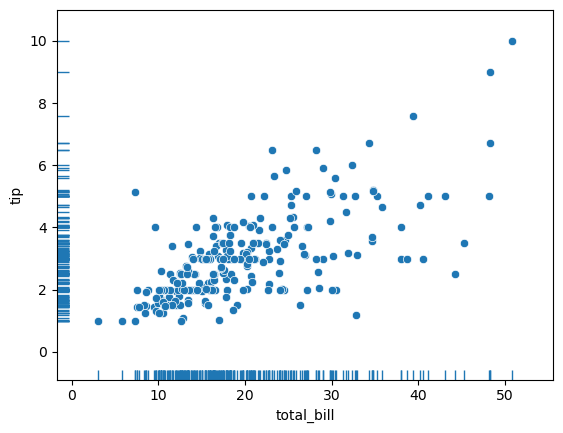

In [49]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip");

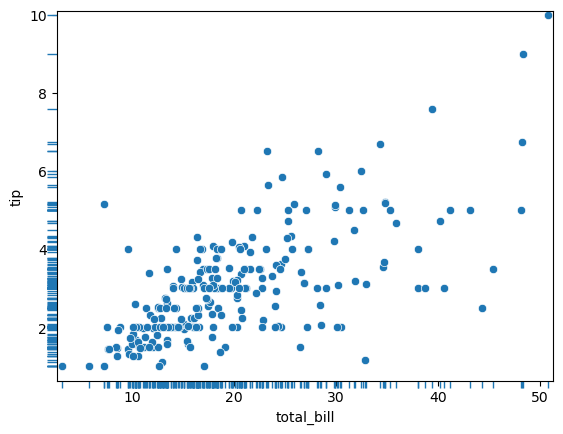

In [50]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=-.02, clip_on=False);

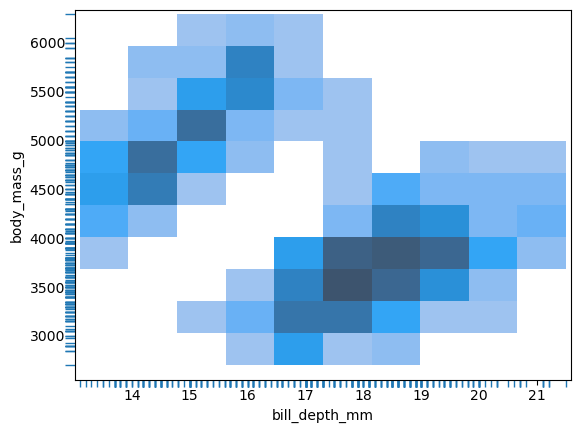

In [51]:
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g")
sns.rugplot(penguins, x="bill_depth_mm", y="body_mass_g", height=-.02, clip_on=False);

## `stripplot` and `catplot`

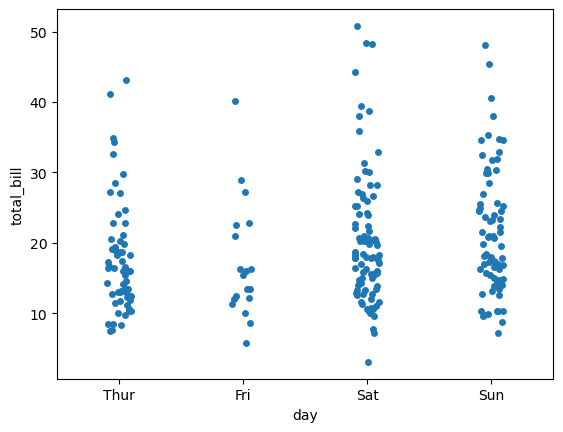

In [52]:
sns.stripplot(data=tips, x="day", y="total_bill");

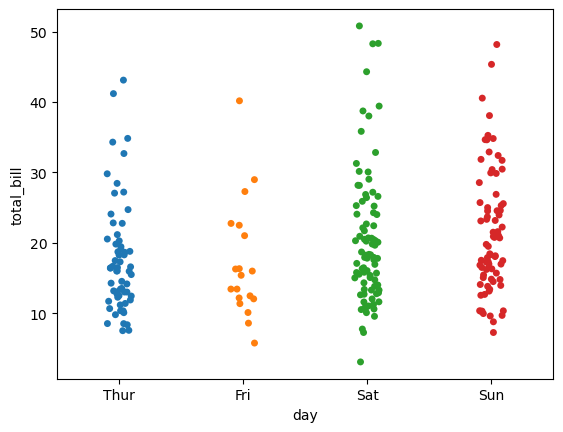

In [53]:
sns.stripplot(data=tips, x="day", y="total_bill", hue="day", legend=False);

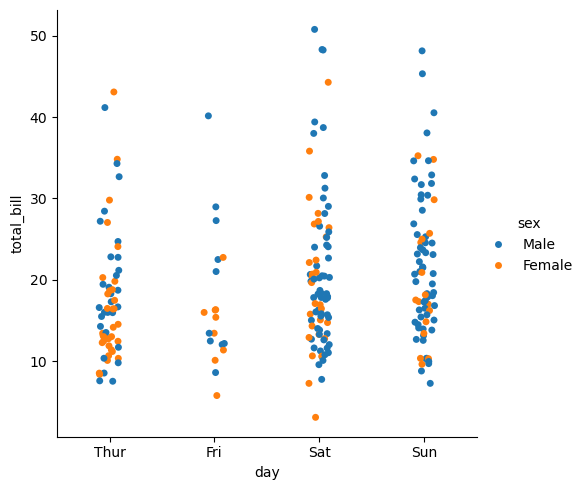

In [54]:
sns.catplot(data=tips, y="total_bill", x="day", hue="sex");

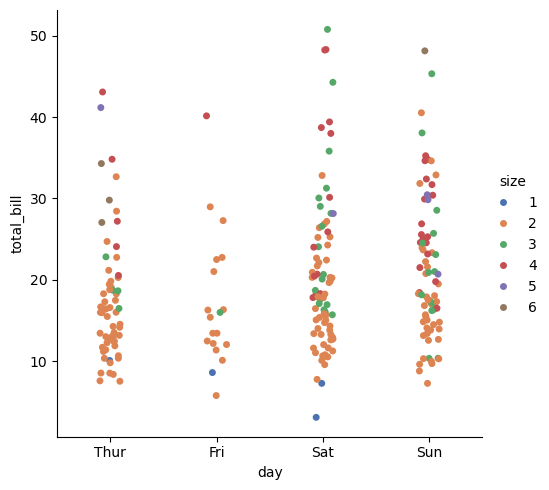

In [55]:
sns.catplot(data=tips, y="total_bill", x="day", hue="size", palette="deep");

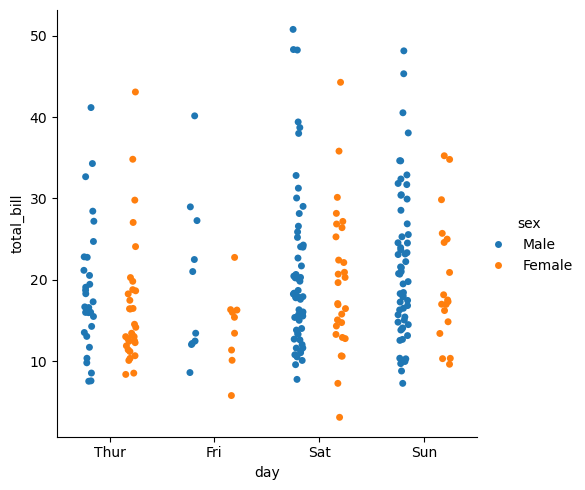

In [56]:
sns.catplot(data=tips, y="total_bill", x="day", hue="sex", dodge=True);

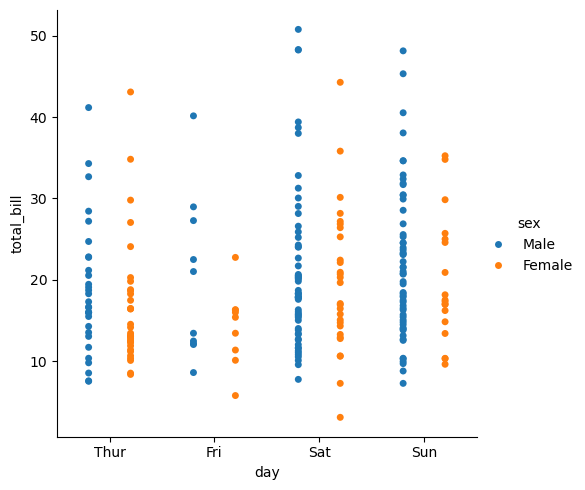

In [57]:
sns.catplot(data=tips, y="total_bill", x="day", hue="sex", dodge=True, jitter=False);

We can play with it:

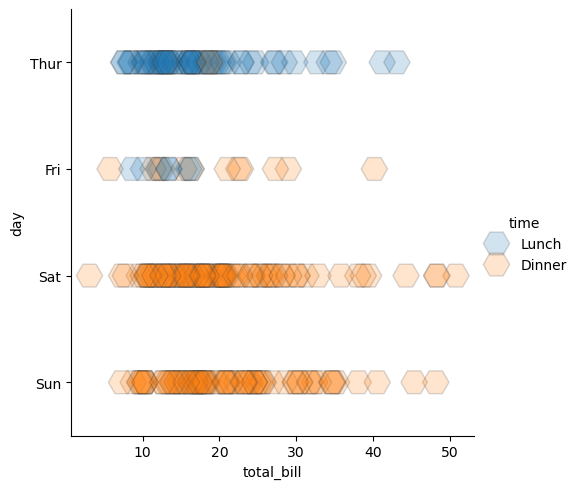

In [58]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="time",
    jitter=False, s=360, marker="H", linewidth=1, alpha=.2,
);

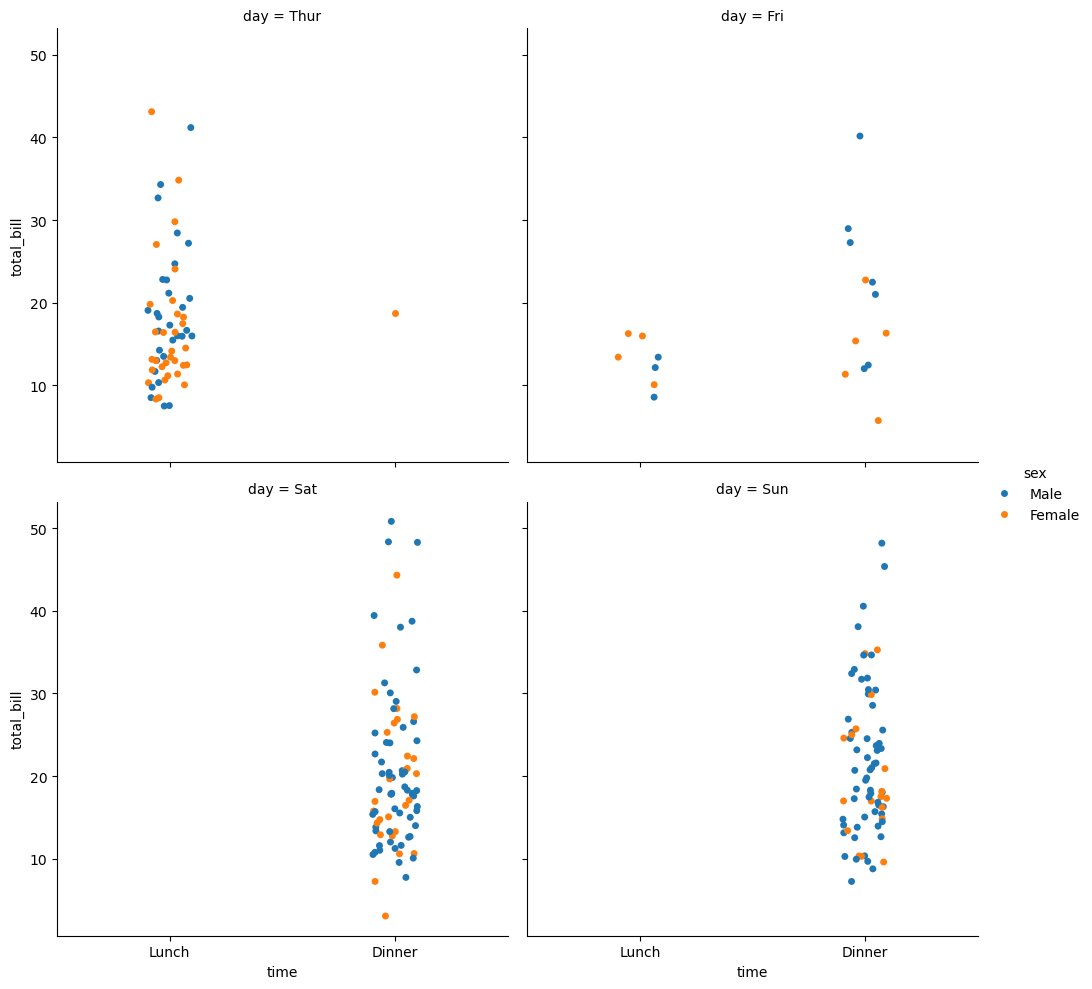

In [59]:
sns.catplot(data=tips, x="time", y="total_bill", hue="sex", col="day", col_wrap=2);

## `violinplot`

Violinplot represents a distribution two ways: a patch showing a symmetric kernel density estimate (KDE), and the quartiles / whiskers of a box plot.

In [60]:
df = sns.load_dataset("titanic")
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
700,1,1,female,18.0,1,0,227.5250,C,First,woman,False,C,Cherbourg,yes,False
20,0,2,male,35.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
94,0,3,male,59.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
703,0,3,male,25.0,0,0,7.7417,Q,Third,man,True,NaN,Queenstown,no,True


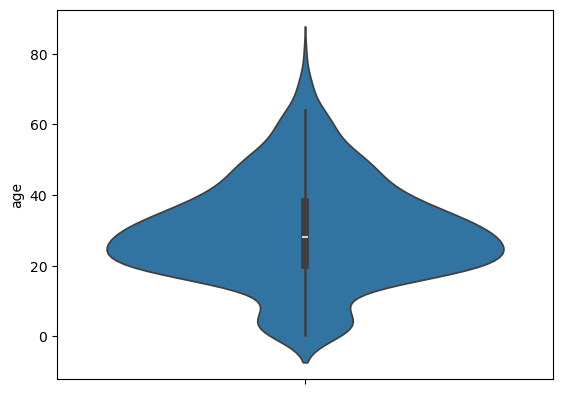

In [61]:
sns.violinplot(y=df["age"]);

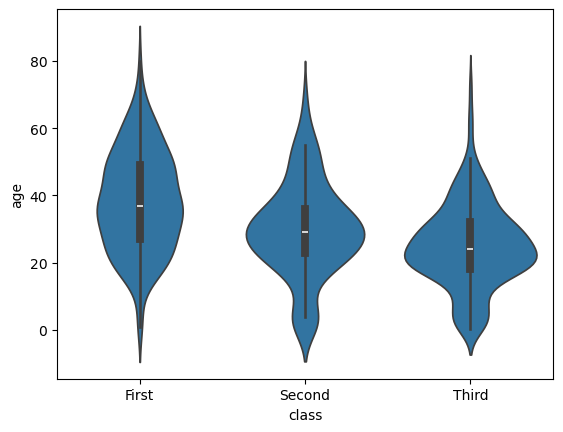

In [62]:
sns.violinplot(data=df, y="age", x="class");

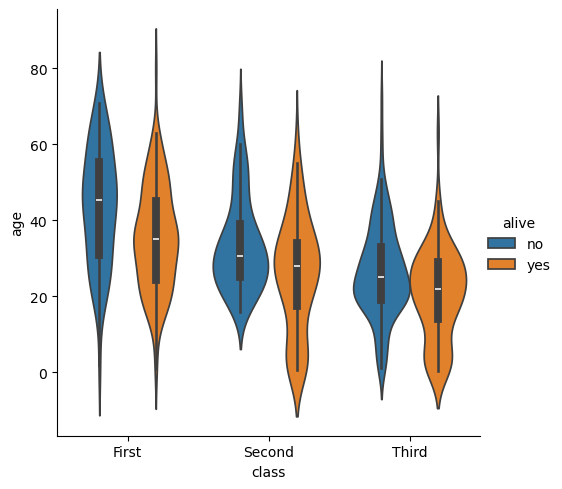

In [63]:
sns.catplot(data=df, x="class", y="age", hue="alive", kind="violin");

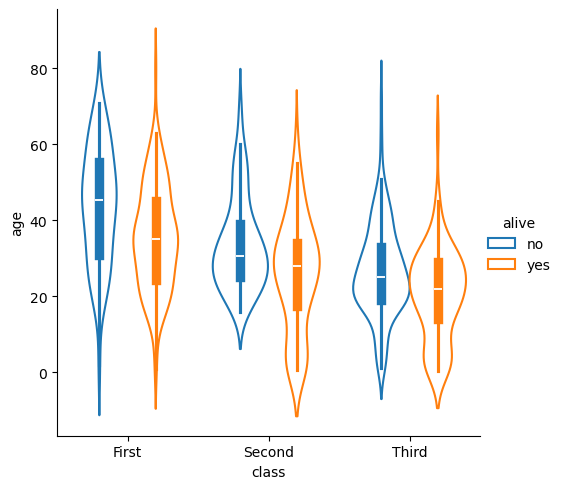

In [64]:
sns.catplot(data=df, x="class", y="age", hue="alive", fill=False, kind="violin");

Draw “split” violins to take up less space, and only show the data quarties.

Best works when `hue` is binary.

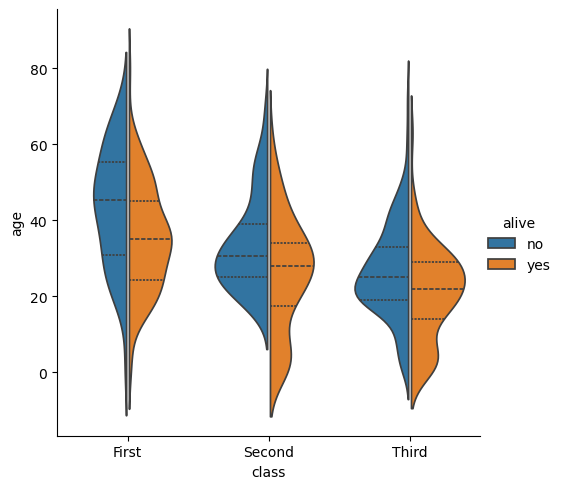

In [65]:
sns.catplot(data=df, x="class", y="age", hue="alive", gap=.05, split=True, inner="quart", kind="violin");

The `inner` parameter in **violin plots** controls the appearance of **data points** inside each violin. It determines what is displayed within the distribution shape.

#### Available `inner` Options:
- **`"box"`** – Displays a **miniature boxplot** inside each violin (default).
- **`"quart"`** – Draws horizontal lines at the **quartiles (25th, 50th, and 75th percentiles)**.
- **`"point"`** – Shows individual **data points** inside the violin.
- **`"stick"`** – Displays **vertical lines** for each observation.
- **`None`** – Removes any internal markings, leaving only the violin shape.

#### How `inner` Affects the Plot
- **`"quart"`** (used in your example) highlights **central tendencies** without overwhelming the visualization.
- **`"box"`** adds a **boxplot** for better statistical insights.
- **`"point"`** or `"stick"` can be useful for **smaller datasets** to show individual values.

#### Best Use Cases
- **`"box"`** – When comparing distributions **with summary statistics**.
- **`"quart"`** – When emphasizing **percentiles and medians**.
- **`"point"` / `"stick"`** – When dealing with **small datasets** to show actual observations.
- **`None`** – When focusing **only on density distribution**.



By default, the “inner” representation scales with the linewidth and linecolor parameters.

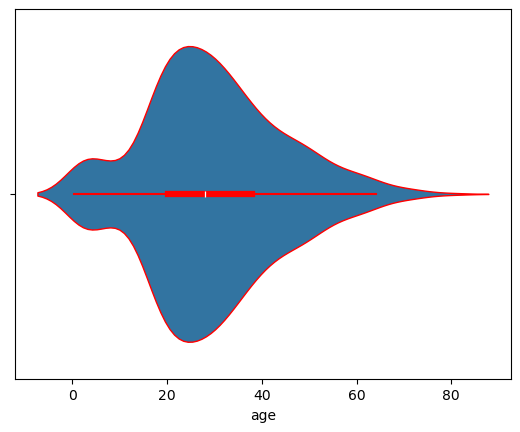

In [66]:
sns.violinplot(data=df, x="age", linewidth=1, linecolor="red");

Use inner_kws to pass parameters directly to the inner plotting functions.

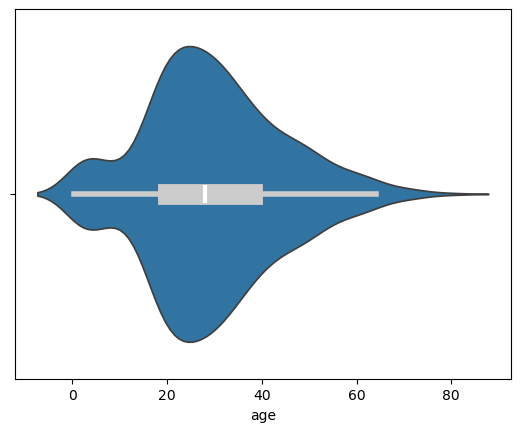

In [67]:
sns.violinplot(data=df, x="age", inner_kws=dict(box_width=15, whis_width=4, color=".8"));
# `whis_width` parameter controls the width of the whisker caps